In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics


In [2]:
bank = pd.read_csv(r'C:\Users\majet\OneDrive\Desktop\chandana\Internship\projects\bank\bank-additional-full_cleaned.csv')

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


C:\ProgramData\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


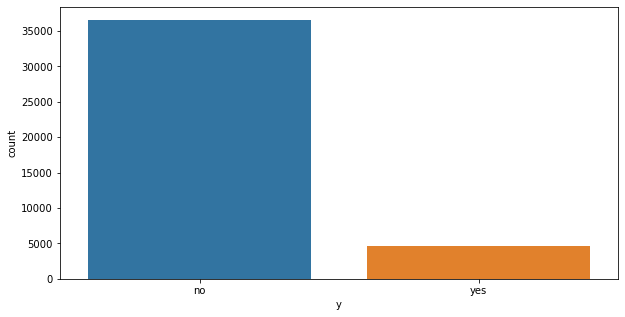

In [5]:
plt.figure(figsize=(10,5))
sns.countplot(bank.y)
plt.show()

In [6]:
!pip install imbalanced-learn

In [7]:

bank.shape
bank.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [8]:
# class count
y_count_no, y_count_true = bank['y'].value_counts()

# divie class
y_no = bank[bank['y'] == "no"]
y_true = bank[bank['y'] == "yes"]

In [9]:
print('class no:', y_no.shape)
print('\nclass yes:', y_true.shape)

class no: (36548, 21)

class yes: (4640, 21)


# Re-sampling - over sampling

total class of 1 and 0:
 yes    36548
no     36548
Name: y, dtype: int64


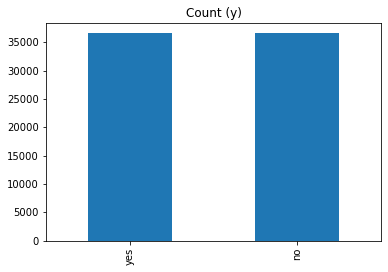

In [10]:
y_true_over = y_true.sample(y_count_no, replace = True)

test_over = pd.concat([y_true_over, y_no], axis=0)

print("total class of 1 and 0:\n",test_over['y'].value_counts())

test_over['y'].value_counts().plot(kind='bar', title='Count (y)')
plt.show()

In [11]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [12]:
x = bank.drop("y", axis=1)
y = bank["y"]

In [13]:
!pip install scikit-learn

# Data Cleaning

In [14]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [15]:
bank.shape

(41188, 21)

In [16]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [17]:
bank['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [18]:
bank['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [19]:
bank['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [20]:
bank['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [21]:
bank['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [22]:
bank['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [23]:
bank.drop(bank.index[bank['marital'] == 'unknown'], inplace = True)

In [24]:
bank['marital'].value_counts()

married     24928
single      11568
divorced     4612
Name: marital, dtype: int64

In [25]:
bank.shape

(41108, 21)

In [26]:
# removing all the unknown values from the dataset

bank.drop(bank.index[bank['education'] == 'unknown'], inplace = True)
bank.drop(bank.index[bank['housing'] == 'unknown'], inplace = True)
bank.drop(bank.index[bank['loan'] == 'unknown'], inplace = True)
bank.drop(bank.index[bank['job'] == 'unknown'], inplace = True)
bank.drop(bank.index[bank['default'] == 'unknown'], inplace = True)
bank.drop(bank.index[bank['contact'] == 'unknown'], inplace = True)


In [27]:
bank['job'].value_counts()

admin.           8737
blue-collar      5675
technician       5473
services         2857
management       2311
retired          1216
self-employed    1092
entrepreneur     1089
unemployed        738
housemaid         690
student           610
Name: job, dtype: int64

In [28]:
bank['education'].value_counts()

university.degree      10412
high.school             7699
professional.course     4321
basic.9y                4276
basic.4y                2380
basic.6y                1389
illiterate                11
Name: education, dtype: int64

In [29]:
bank['housing'].value_counts()

yes    16521
no     13967
Name: housing, dtype: int64

In [30]:
bank['loan'].value_counts()

no     25720
yes     4768
Name: loan, dtype: int64

In [31]:
bank['default'].value_counts()

no     30485
yes        3
Name: default, dtype: int64

In [32]:
bank['contact'].value_counts()

cellular     20443
telephone    10045
Name: contact, dtype: int64

In [33]:
bank['month'].value_counts()

may    9733
jul    5081
aug    4673
jun    3614
nov    3496
apr    2115
oct     642
sep     495
mar     482
dec     157
Name: month, dtype: int64

In [34]:
bank['day_of_week'].value_counts()

thu    6395
mon    6279
wed    6125
tue    5955
fri    5734
Name: day_of_week, dtype: int64

In [35]:
bank['poutcome'].value_counts()

nonexistent    25836
failure         3461
success         1191
Name: poutcome, dtype: int64

In [36]:
bank.shape

(30488, 21)

In [37]:
bank["education"].replace({"university.degree": "university"}, inplace=True)

In [38]:
bank["y"].replace({"yes": 1, "no": 0}, inplace=True)

In [39]:
bank['y'].value_counts()

0    26629
1     3859
Name: y, dtype: int64

In [40]:
bank.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [41]:
bank['education'].value_counts()

university             10412
high.school             7699
professional.course     4321
basic.9y                4276
basic.4y                2380
basic.6y                1389
illiterate                11
Name: education, dtype: int64

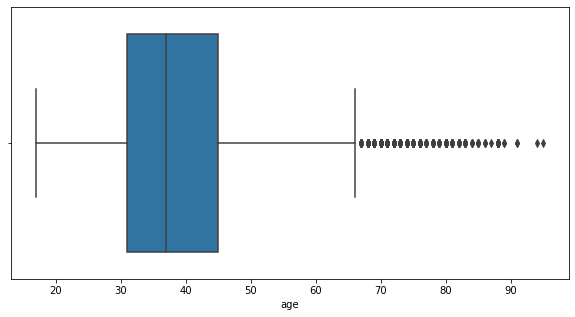

In [43]:
#outliers
plt.figure(figsize=(10,5))
sns.boxplot(x = 'age', data=bank)

plt.show()

In [46]:
Q1 = bank.quantile(0.25)
Q3 = bank.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                14.000
duration          218.000
campaign            2.000
pdays               0.000
previous            0.000
emp.var.rate        3.200
cons.price.idx      0.919
cons.conf.idx       6.300
euribor3m           3.648
nr.employed       129.000
y                   0.000
dtype: float64


In [47]:

print(bank['age'].quantile(0.5))
print(bank['age'].quantile(0.95))
print(bank['age'].quantile(0.75))

37.0
58.0
45.0


In [56]:
bank['age'] = np.where(bank['age'] > 85.0, 47.0, bank['age'])

In [57]:
bank['age'].describe()

count    30488.000000
mean        38.219463
std          8.748923
min         17.000000
25%         31.000000
50%         37.000000
75%         45.000000
max         58.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

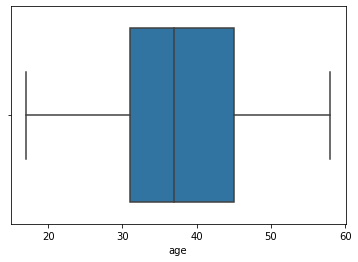

In [58]:
sns.boxplot(x = 'age', data=bank)

In [61]:
bank['duration'].describe()

count    30488.000000
mean       259.484092
std        261.714262
min          0.000000
25%        103.000000
50%        181.000000
75%        321.000000
max       4918.000000
Name: duration, dtype: float64

In [69]:

print(bank['duration'].quantile(0.5))
print(bank['duration'].quantile(0.95))
print(bank['duration'].quantile(0.75))

181.0
753.0
321.0


<AxesSubplot:xlabel='duration'>

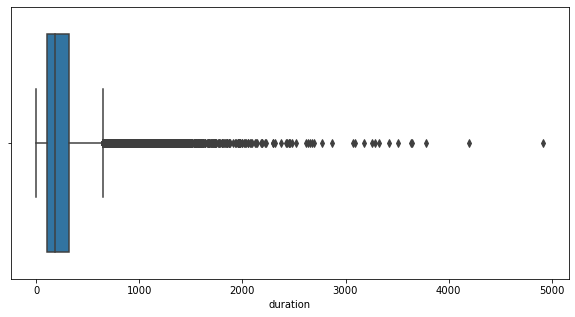

In [60]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'duration', data=bank)

In [73]:
#replacing the outlier values with the median value.
bank['duration'] = np.where(bank['duration'] > 650.0,321.0, bank['duration'])

<AxesSubplot:xlabel='duration'>

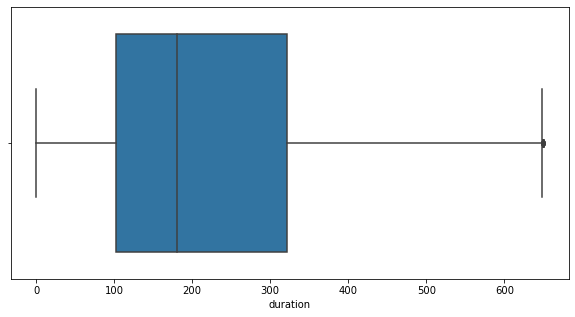

In [74]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'duration', data=bank)

<AxesSubplot:xlabel='campaign'>

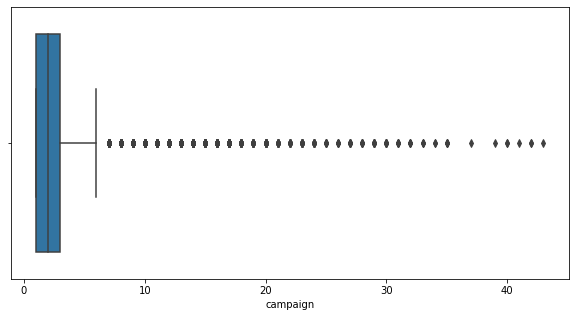

In [75]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'campaign', data=bank)

In [76]:

print(bank['campaign'].quantile(0.5))
print(bank['campaign'].quantile(0.95))
print(bank['campaign'].quantile(0.75))

2.0
7.0
3.0


In [79]:
#replacing the outlier values
bank['campaign'] = np.where(bank['campaign'] > 6.5,3.0, bank['campaign'])

<AxesSubplot:xlabel='campaign'>

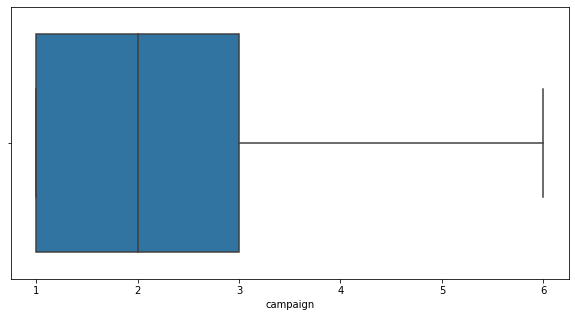

In [80]:
# after removing the outliers, we are displaying the boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x = 'campaign', data=bank)